In [1]:
import pandas as pd
#import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

#load data
#WeatherData_269 = pd.read_csv("DATA/WeatherData_269.txt", sep=",", header=0)
#WeatherData_280 = pd.read_csv("DATA/WeatherData_280.txt", sep=",", header=0)
#WeatherData_290 = pd.read_csv("DATA/WeatherData_290.txt", sep=",", header=0)
#WeatherData_391 = pd.read_csv("DATA/WeatherData_391.txt", sep=",", header=0)
#WeatherData = pd.concat([WeatherData_280,WeatherData_269,WeatherData_290,WeatherData_391], axis=0)

#WeatherData.to_csv('DATA/WeatherData_Combined.txt',index=False)

SolarData = pd.read_csv("DATA/SolarData.txt", sep=",")
SolarData = SolarData[SolarData['On/Off'] == 1]
WeatherData = pd.read_csv("DATA/WeatherData_Combined.txt", sep=",", header=0)
WindData = pd.read_csv("DATA/WindData.txt", sep=",")
WindData = WindData[WindData['On/Off'] == 1]

In [24]:
# SOLAR
merged_df = pd.merge(SolarData, WeatherData,on=['Date','location'], how='inner')
df = merged_df
df_corr = df.corr()['kWh produced']

C:\Users\bruno\AppData\Local\Temp\ipykernel_11808\202409169.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_corr = df.corr()['kWh produced']


In [25]:
df_corr = df_corr[df_corr > 0.7]
#df_corr.to_csv('correlation')
print(df_corr.index)

Index(['kWh produced', 'TX', 'SQ', 'Q', 'EV24'], dtype='object')


In [ ]:
target_column = 'kWh produced'
regression_columns = df_corr.index.tolist()
regression_columns.remove('kWh produced')
print(regression_columns)
# Calculate correlation coefficient
correlation_coefficient = df[regression_columns +[target_column]].corr()[target_column]
correlation_coefficient = correlation_coefficient.drop(
    target_column)  # Drop self-correlation with target column
print('Correlation coefficients:')
print(correlation_coefficient)
df = df.dropna(subset=[target_column] + regression_columns)
for column in regression_columns:
    # Linear Regression
    linear_model = LinearRegression()
    linear_model.fit(df[[column]], df[target_column])

    # Plotting
    sns.set(style="darkgrid")
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=column, y=target_column, data=df)
    plt.plot(df[column], linear_model.predict(df[[column]]), color='red')
    plt.title('Linear Regression for {}'.format(column))
    plt.xlabel(column)
    plt.ylabel(target_column)
    plt.show()

    # Print the coefficients
    print('Linear Regression Coefficients for {}:'.format(
        column), linear_model.coef_)


In [2]:
#WIND
merged_df = pd.merge(WindData, WeatherData,on=['Date','location'], how='inner')
df = merged_df
df_corr = df.corr()['kWh produced']

C:\Users\bruno\AppData\Local\Temp\ipykernel_6592\2030455169.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_corr = df.corr()['kWh produced']


In [3]:
df_corr = df_corr[df_corr > 0.7]
#df_corr.to_csv('correlation')
print(df_corr.index)

Index(['kWh produced', 'FHVEC', 'FG', 'FHX', 'FHN', 'FXX'], dtype='object')


['FHVEC', 'FG', 'FHX', 'FHN', 'FXX']
Correlation coefficients:
FHVEC    0.909322
FG       0.955262
FHX      0.843018
FHN      0.783148
FXX      0.766116
Name: kWh produced, dtype: float64


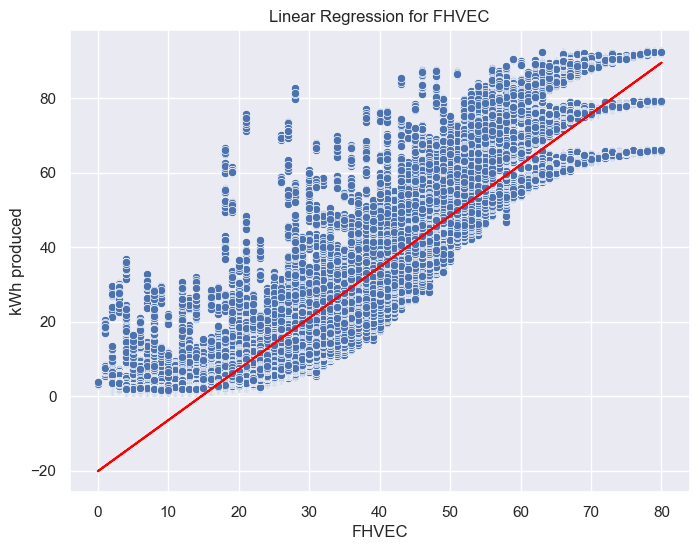

Linear Regression Coefficients for FHVEC: [1.36952758]


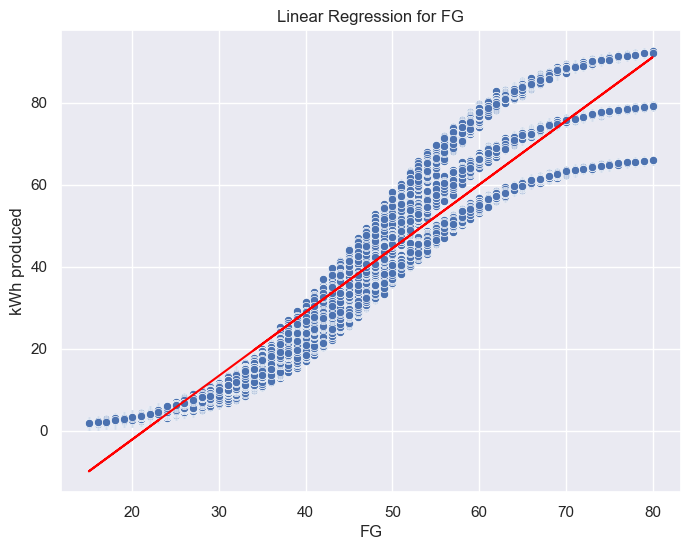

Linear Regression Coefficients for FG: [1.55259121]


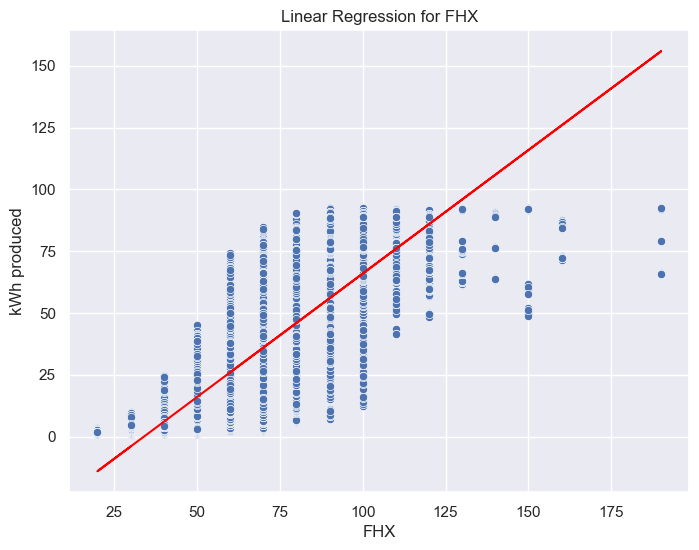

Linear Regression Coefficients for FHX: [0.99948759]


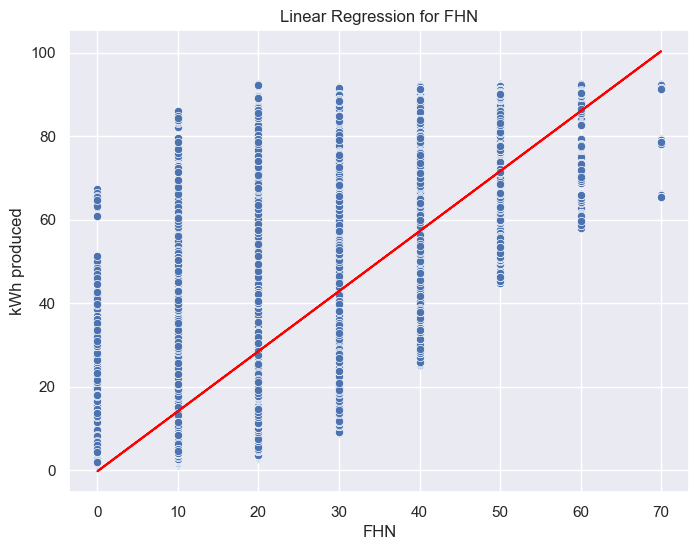

Linear Regression Coefficients for FHN: [1.43815236]


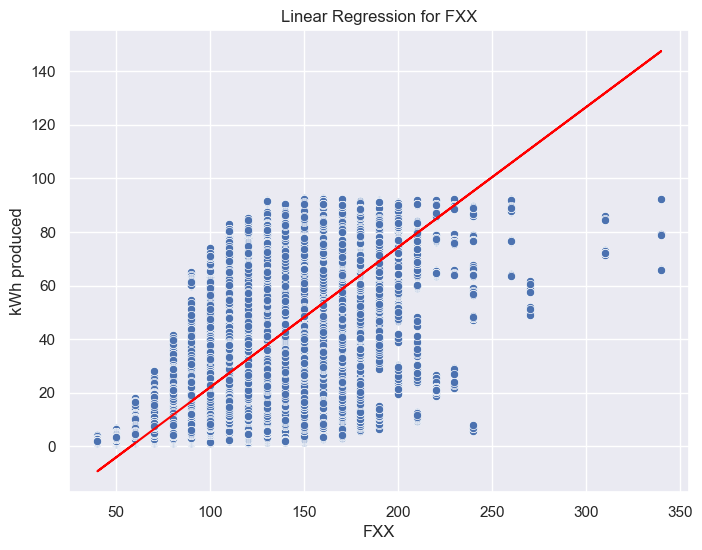

Linear Regression Coefficients for FXX: [0.52228459]


In [4]:
target_column = 'kWh produced'
regression_columns = df_corr.index.tolist()
regression_columns.remove('kWh produced')
print(regression_columns)
# Calculate correlation coefficient
correlation_coefficient = df[regression_columns +[target_column]].corr()[target_column]
correlation_coefficient = correlation_coefficient.drop(
    target_column)  # Drop self-correlation with target column
print('Correlation coefficients:')
print(correlation_coefficient)
df = df.dropna(subset=[target_column] + regression_columns)
for column in regression_columns:
    # Linear Regression
    linear_model = LinearRegression()
    linear_model.fit(df[[column]], df[target_column])

    # Plotting
    sns.set(style="darkgrid")
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=column, y=target_column, data=df)
    plt.plot(df[column], linear_model.predict(df[[column]]), color='red')
    plt.title('Linear Regression for {}'.format(column))
    plt.xlabel(column)
    plt.ylabel(target_column)
    plt.show()

    # Print the coefficients
    print('Linear Regression Coefficients for {}:'.format(
        column), linear_model.coef_)
